## 2. Nonlinear Optimization

In [6]:
using PyPlot
using Formatting
using Random
using LinearAlgebra
using Printf
using ForwardDiff

Random.seed!(1234);

In [19]:
function f_obs(x)
    return 1/2*x[1]^4-2*x[1]^2*x[2]+4*x[2]^2+8*x[1]+8x[2]
end

f_obs (generic function with 1 method)

### Example 2.5

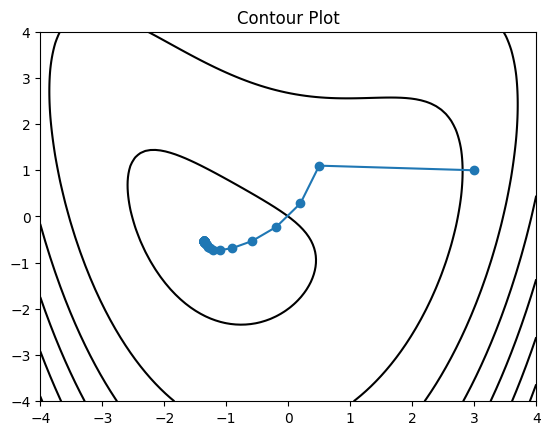

[50.0, -2.0]
[-1.36466, -0.534429]


In [52]:
f(x::Vector) = f_obs(x)
g = x -> ForwardDiff.gradient(f, x)

x0 = [3, 1]
println(g(x0))

loop_num = 100
alpha = 0.05
x_history = x0
xn = x0
for i in 1:loop_num
   
    dn = -g(xn)             # 勾配を計算
    xn = xn + alpha .* dn   # 更新
    
    x_history = hcat(x_history, xn)
end

println(xn)

# 最適化する関数のコンター図の準備
n=100
x1 = range(-4, stop=4, length=n)
x2 = range(-4, stop=4, length=n)
x1grid = repeat(x1', n, 1)
x2grid = repeat(x2, 1, n)

z = zeros(n, n)
for i in 1:n
    for j in 1:n
        z[i, j] = f_obs([x1[j], x2[i]])
    end
end

# 解の点列の準備
x1_scatter = x_history[1, :]
x2_scatter = x_history[2, :]

# 解の軌跡の準備
lines = Any[collect(zip(x1_scatter, x2_scatter))]
line_segments = matplotlib.collections.LineCollection(lines)

# 全部プロット
fig.add_subplot(1, 2, 2)
PyPlot.contour(x1grid, x2grid, z, colors="black", linewidth=1.0)
PyPlot.scatter(x1_scatter, x2_scatter)
ax = PyPlot.axes()
ax.add_collection(line_segments)
PyPlot.title("Contour Plot")
PyPlot.show()